#Import

In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv('review.csv')

In [115]:
yelp = yelp.fillna('')

In [14]:
yelp.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [20]:
yelp.isnull().any()

Unnamed: 0                 False
Clothing ID                False
Age                        False
Title                      False
Review Text                False
Rating                     False
Recommended IND            False
Positive Feedback Count    False
Division Name              False
Department Name            False
Class Name                 False
dtype: bool

In [21]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      23486 non-null object
Review Text                23486 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23486 non-null object
Department Name            23486 non-null object
Class Name                 23486 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [22]:
yelp.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [23]:
yelp['text length'] = yelp['Review Text'].apply(len)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

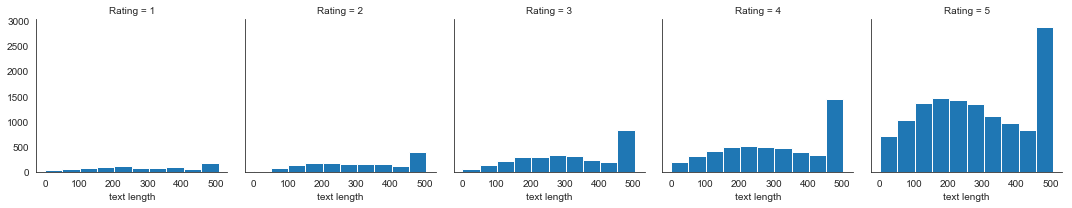

In [26]:
g = sns.FacetGrid(yelp,col='Rating')
g.map(plt.hist,'text length')

**Create a boxplot of text length for each star category.**

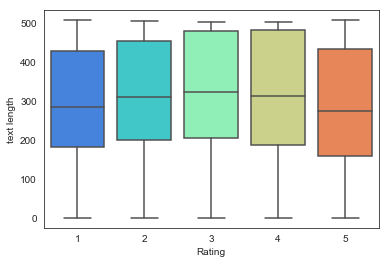

In [27]:
sns.boxplot(x='Rating',y='text length',data=yelp,palette='rainbow')

**Create a countplot of the number of occurrences for each type of star rating.**

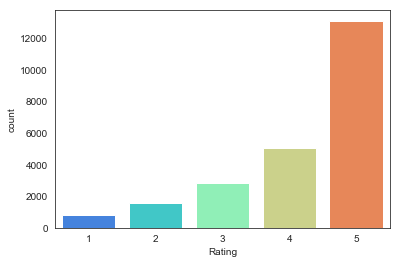

In [28]:
sns.countplot(x='Rating',data=yelp,palette='rainbow')

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [44]:
yelp = yelp.drop(['Clothing ID','Unnamed: 0'],axis=1)

In [45]:
stars = yelp.groupby('Rating').mean()
stars

,Age,Recommended IND,Positive Feedback Count,text length
Rating,,,,
1,43.693587,0.019002,3.459620,296.552257
2,42.622364,0.060064,3.325879,315.352716
3,42.158481,0.414141,3.145246,321.951585
4,42.887532,0.966910,2.405554,311.684459
5,43.583124,0.998096,2.299749,284.748610


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [46]:
stars.corr()

,Age,Recommended IND,Positive Feedback Count,text length
Age,1.000000,0.115681,-0.194958,-0.930753
Recommended IND,0.115681,1.000000,-0.987748,-0.309365
Positive Feedback Count,-0.194958,-0.987748,1.000000,0.385765
text length,-0.930753,-0.309365,0.385765,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

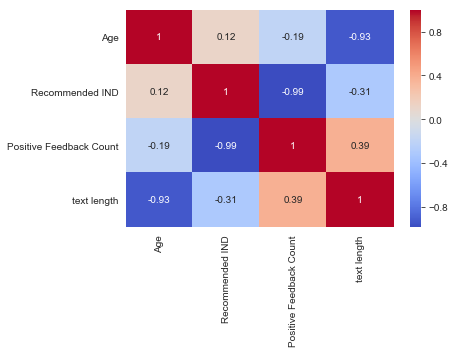

In [47]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

In [49]:
yelp_class = yelp[(yelp.Rating==1) | (yelp.Rating==5)]

In [96]:
X = yelp_class['Review Text']
y = yelp_class['Rating']

**Import CountVectorizer and create a CountVectorizer object.**

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [98]:
X = cv.fit_transform(X)

## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [89]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [100]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [101]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [102]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [103]:
from sklearn.metrics import confusion_matrix,classification_report

In [104]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 106  140]
 [  12 3934]]


             precision    recall  f1-score   support

          1       0.90      0.43      0.58       246
          5       0.97      1.00      0.98      3946

avg / total       0.96      0.96      0.96      4192



# Using Text Processing

** Import TfidfTransformer from sklearn. **

In [105]:
from sklearn.feature_extraction.text import  TfidfTransformer

** Import Pipeline from sklearn. **

In [106]:
from sklearn.pipeline import Pipeline

** Now create a pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()**

In [107]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [110]:
X = yelp_class['Title']
y = yelp_class['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [111]:
# May take some time
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [112]:
predictions = pipeline.predict(X_test)

In [113]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[  41  205]
 [   0 3946]]
             precision    recall  f1-score   support

          1       1.00      0.17      0.29       246
          5       0.95      1.00      0.97      3946

avg / total       0.95      0.95      0.93      4192

